# Supervised Machine Learning

In [11]:
import random
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
    
)
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import xgboost as xgb
import pandas as pd
import numpy as np

#### Prepare the dataset

In [12]:
df_titanic = pd.read_csv('titanic.csv', sep=';')
df_titanic.dropna(subset=["Age", "Fare", "Pclass", "Sex"], inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

In [ ]:
df_titanic["Male"] = (df_titanic["Sex"] == "male") * 1
df_titanic["Female"] = (df_titanic["Sex"] == "female") * 1

In [ ]:
X = df_titanic[["Age", "Fare", "Pclass", "Male", "Female"]]
Y = df_titanic['Survived']

#### Train-test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=532)

In [ ]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_normalized, Y_train)
Y_scores = model.predict_proba(X_train_normalized)
Y_score = Y_scores[:, 1]

In [ ]:
Y_pred = Y_score > 0.7

In [ ]:
np.mean(Y_train == Y_pred)

0.8056112224448898

In [ ]:
accuracy_score(Y_train, Y_pred)

0.8056112224448898

In [ ]:
precision_score(Y_train, Y_pred)

0.9478260869565217

In [ ]:
((Y_pred == 1) & (Y_train == 1)).sum() / (Y_pred == 1).sum()

0.9478260869565217

In [ ]:
recall_score(Y_train, Y_pred)

0.545

In [ ]:
((Y_pred == 1) & (Y_train == 1)).sum() / (Y_train == 1).sum()

0.545

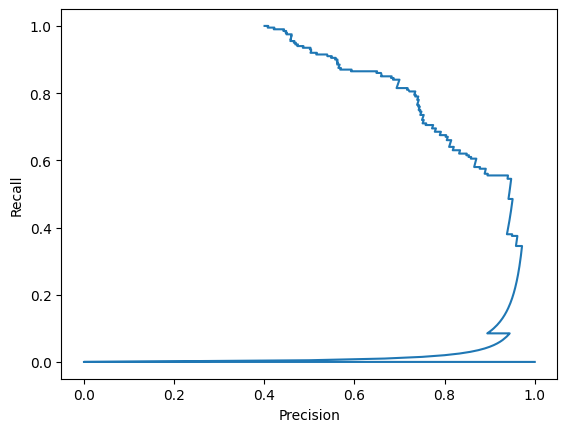

In [ ]:
precision, recall, _ = precision_recall_curve(Y_train, Y_score)
fig = plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall');

In [ ]:
roc_auc_score(Y_train, Y_score)

0.8627926421404682

In [ ]:
# Y_score = np.random.random(size=len(Y))

In [ ]:
fp, tp, _ = roc_curve(Y_train, Y_score)
# fig = plt.plot(fp, tp)
plt.xlabel('False positives')
plt.ylabel('True positives');

NameError: name 'Y_train' is not defined

#### Cross-validation

In [ ]:
# The scores : https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
cv_results = cross_val_score(model, X_train, Y_train, cv=3, scoring='roc_auc')

In [ ]:
cv_results

array([0.83447761, 0.85242424, 0.89522087])

### Grid search

In [ ]:
model = LogisticRegression()

In [ ]:
grid_search_cv = GridSearchCV(model, {'C': [.01, .1, 1, 10, 100]}, cv=3, scoring='roc_auc')

In [ ]:
grid_search_cv.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='roc_auc')

In [ ]:
grid_search_cv.best_score_

0.8607075732448867

In [ ]:
grid_search_cv.best_params_

{'C': 1}